Student Performance Indicator
Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model
1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.
2.1 Import Data and Required Packages
Importing Pandas,Numpy,Matplotlib,Seaborn and warings Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('stud.csv')

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.shape

(1000, 8)

Shape of the dataset

In [15]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

2.2 Dataset information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

3. Data Checks to perform
   
Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column

In [17]:
df.duplicated().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [23]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
From above description of numerical data, all means are very close to each other - between 66 and 68.05;
All standard deviations are also close - between 14.6 and 15.19;
While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [29]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [31]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [33]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [35]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [37]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights
From above values we get students have performed the worst in Maths
Best performance is in reading section
4. Exploring Data ( Visualization )
4.1 Visualize average score distribution to make some conclusion.
Histogram
Kernel Distribution Function (KDE)

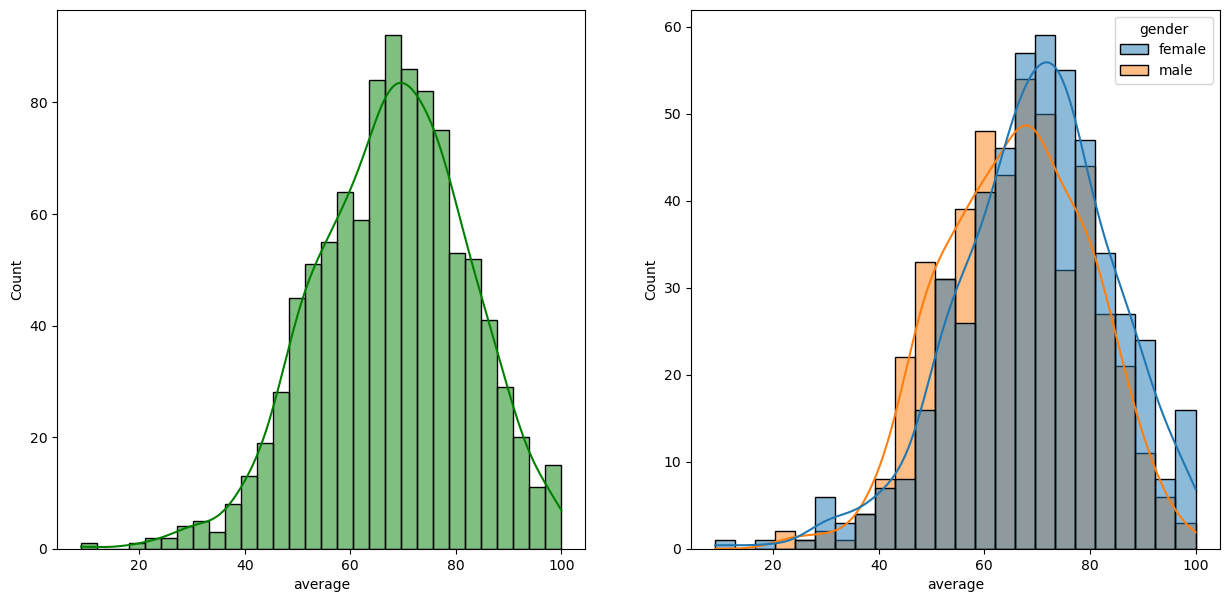

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

Insights
Female students tend to perform well that male students

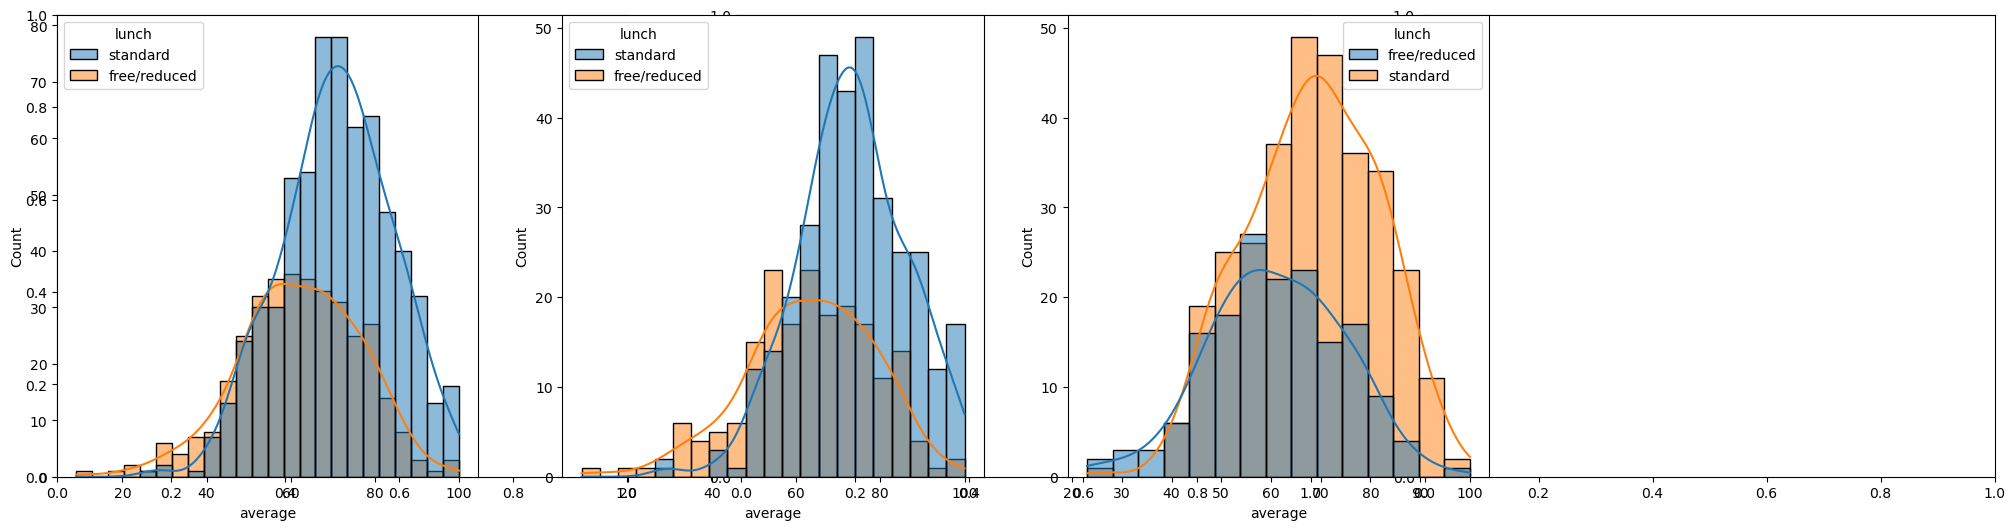

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights
Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female.

In [47]:
df.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

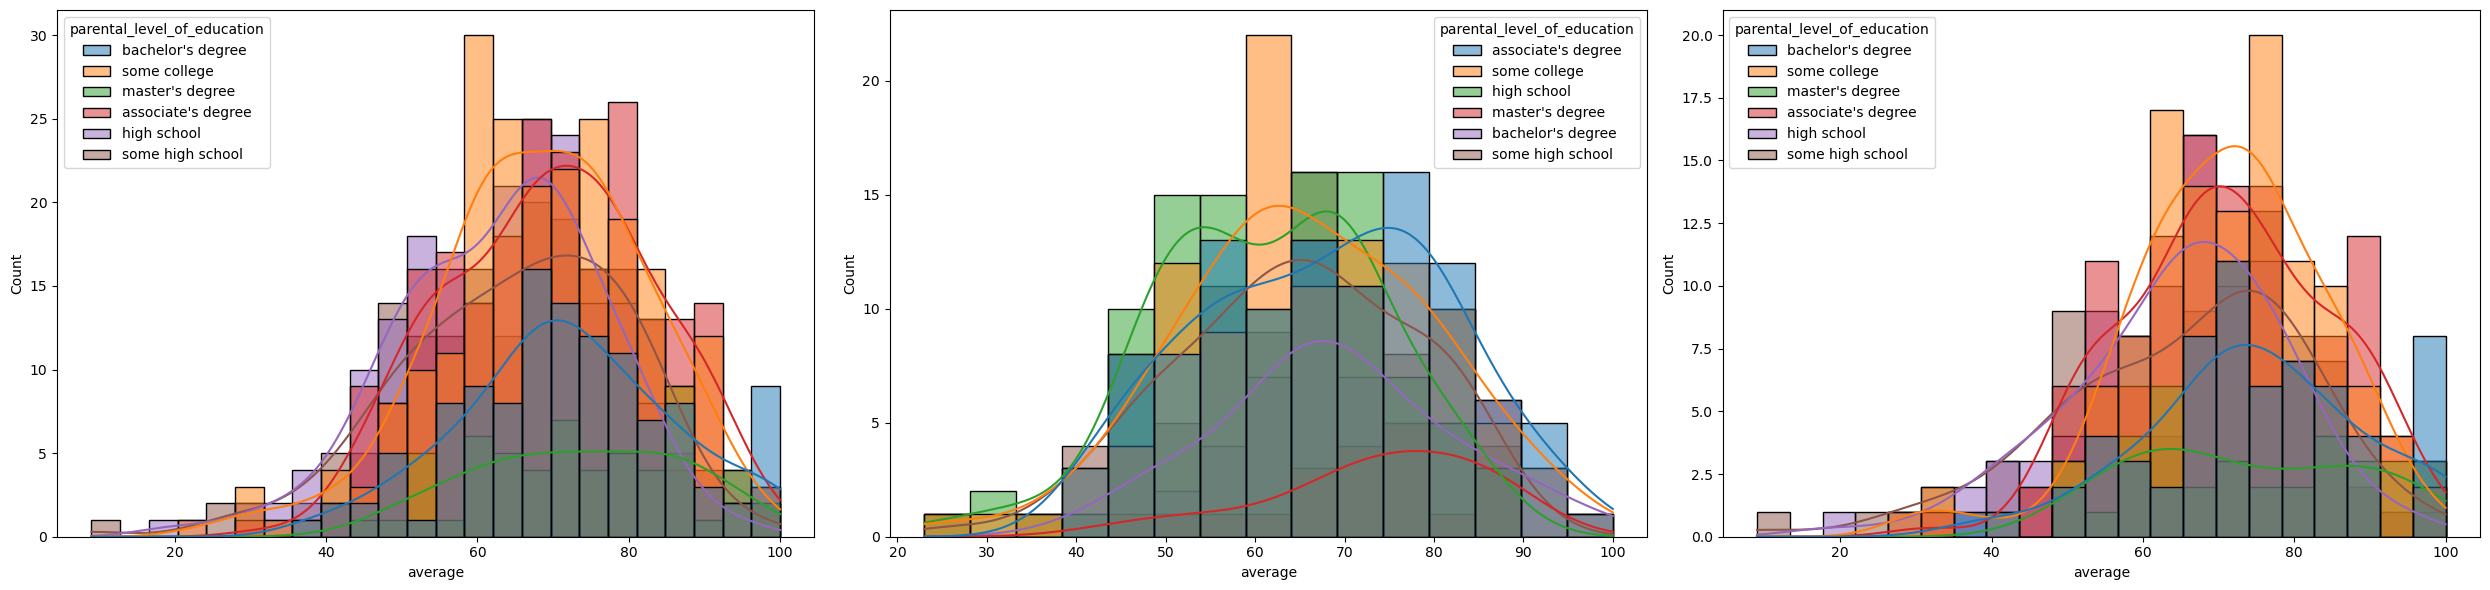

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(
    data=df,
    x='average',
    kde=True,
    hue='parental_level_of_education',
    ax=axes[0]
)

sns.histplot(
    data=df[df.gender == 'male'],
    x='average',
    kde=True,
    hue='parental_level_of_education',
    ax=axes[1]
)

sns.histplot(
    data=df[df.gender == 'female'],
    x='average',
    kde=True,
    hue='parental_level_of_education',
    ax=axes[2]
)

plt.tight_layout()
plt.show()


Insights
In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students.

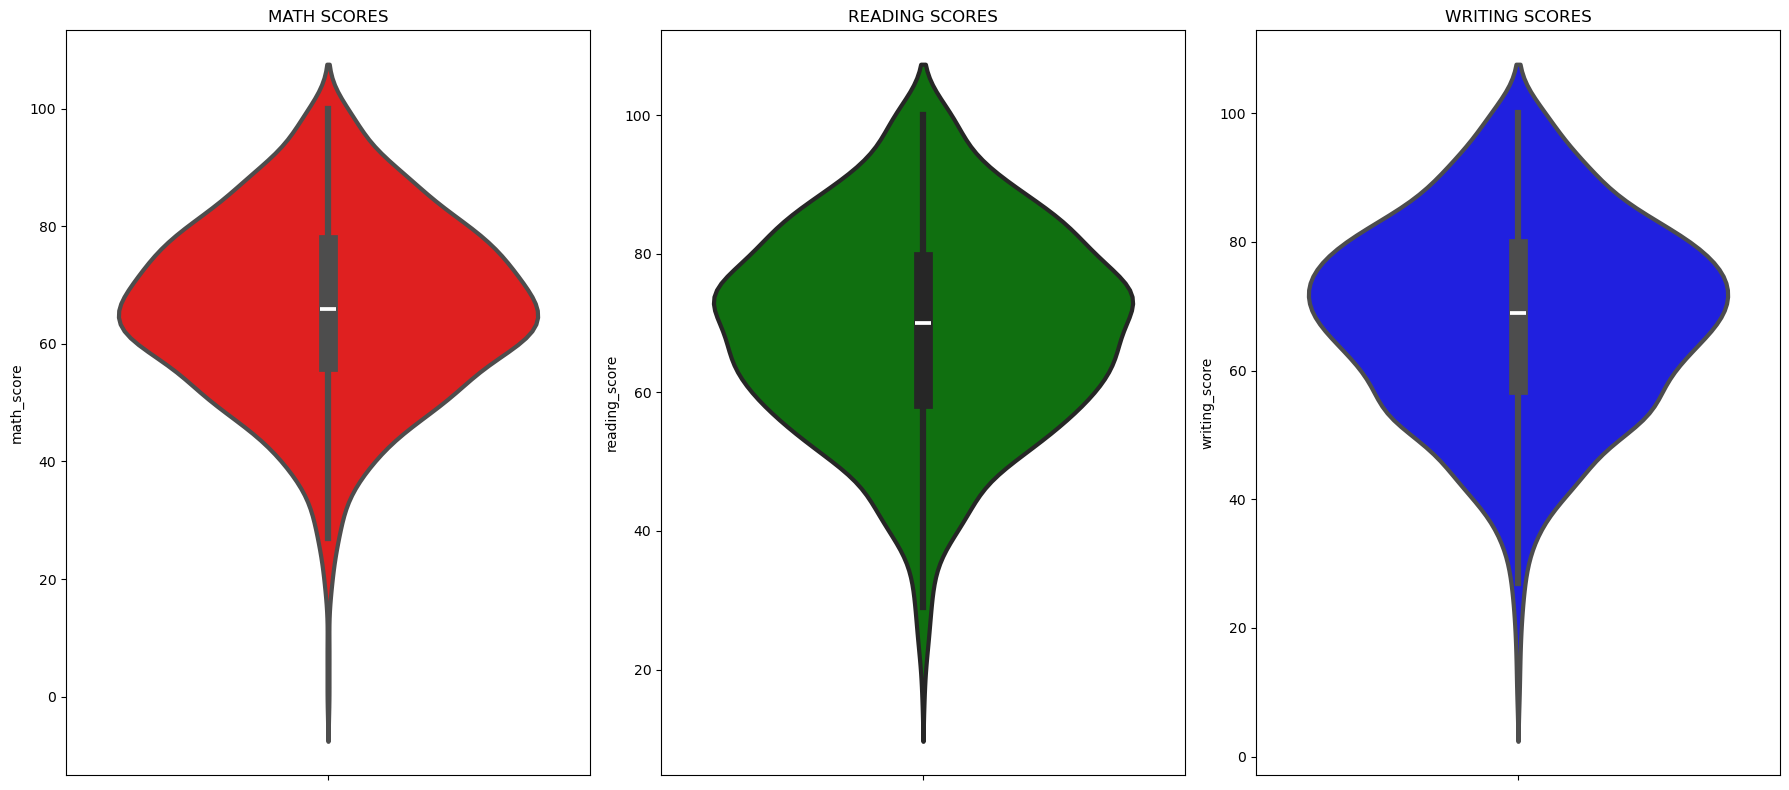

In [53]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.tight_layout()
plt.show()


Insights
Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

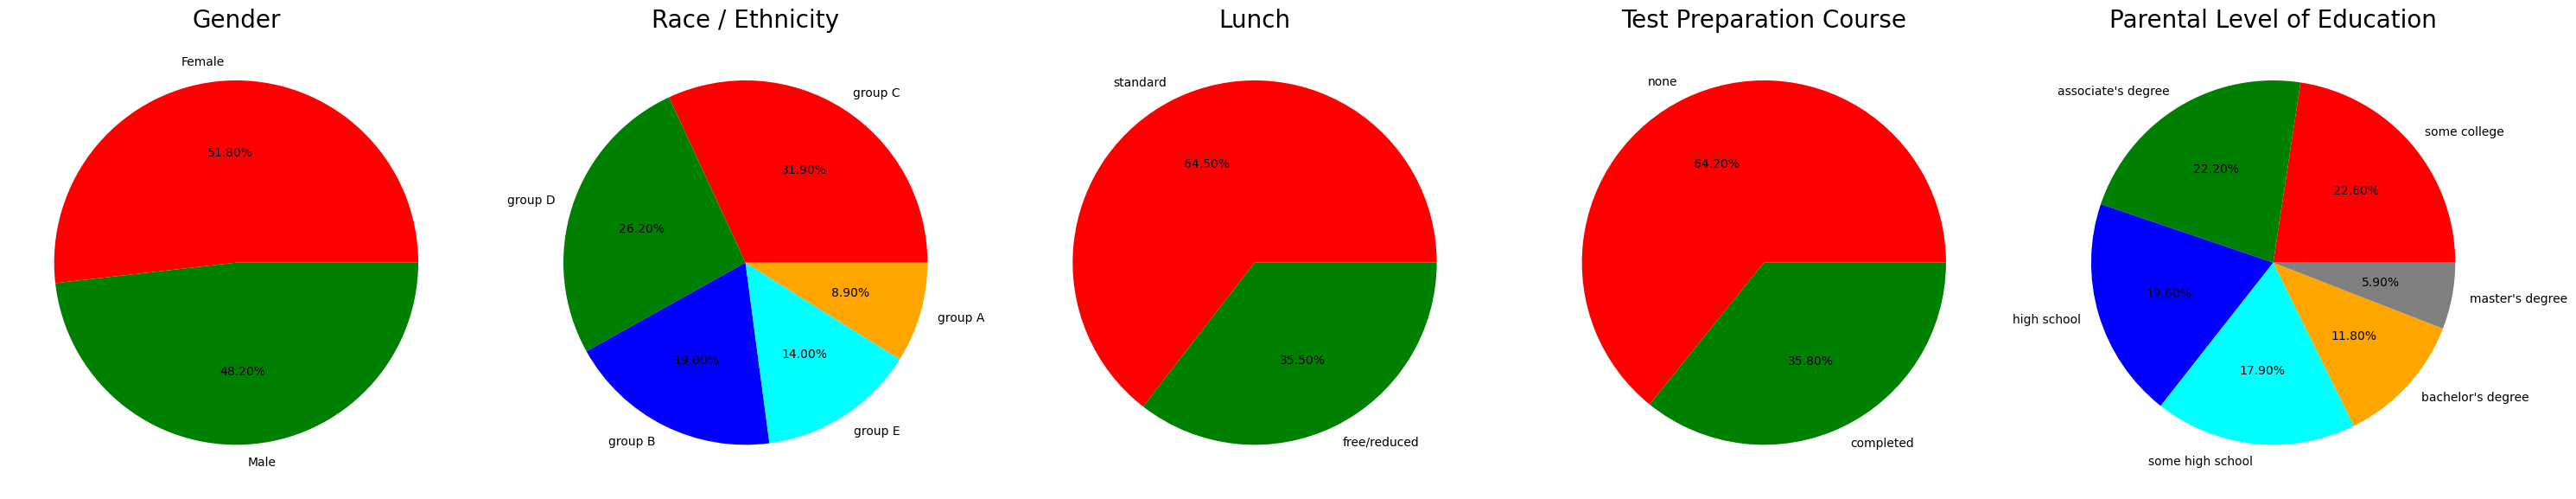

In [55]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race / Ethnicity', fontsize=20)
plt.axis('off')
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis('off')
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


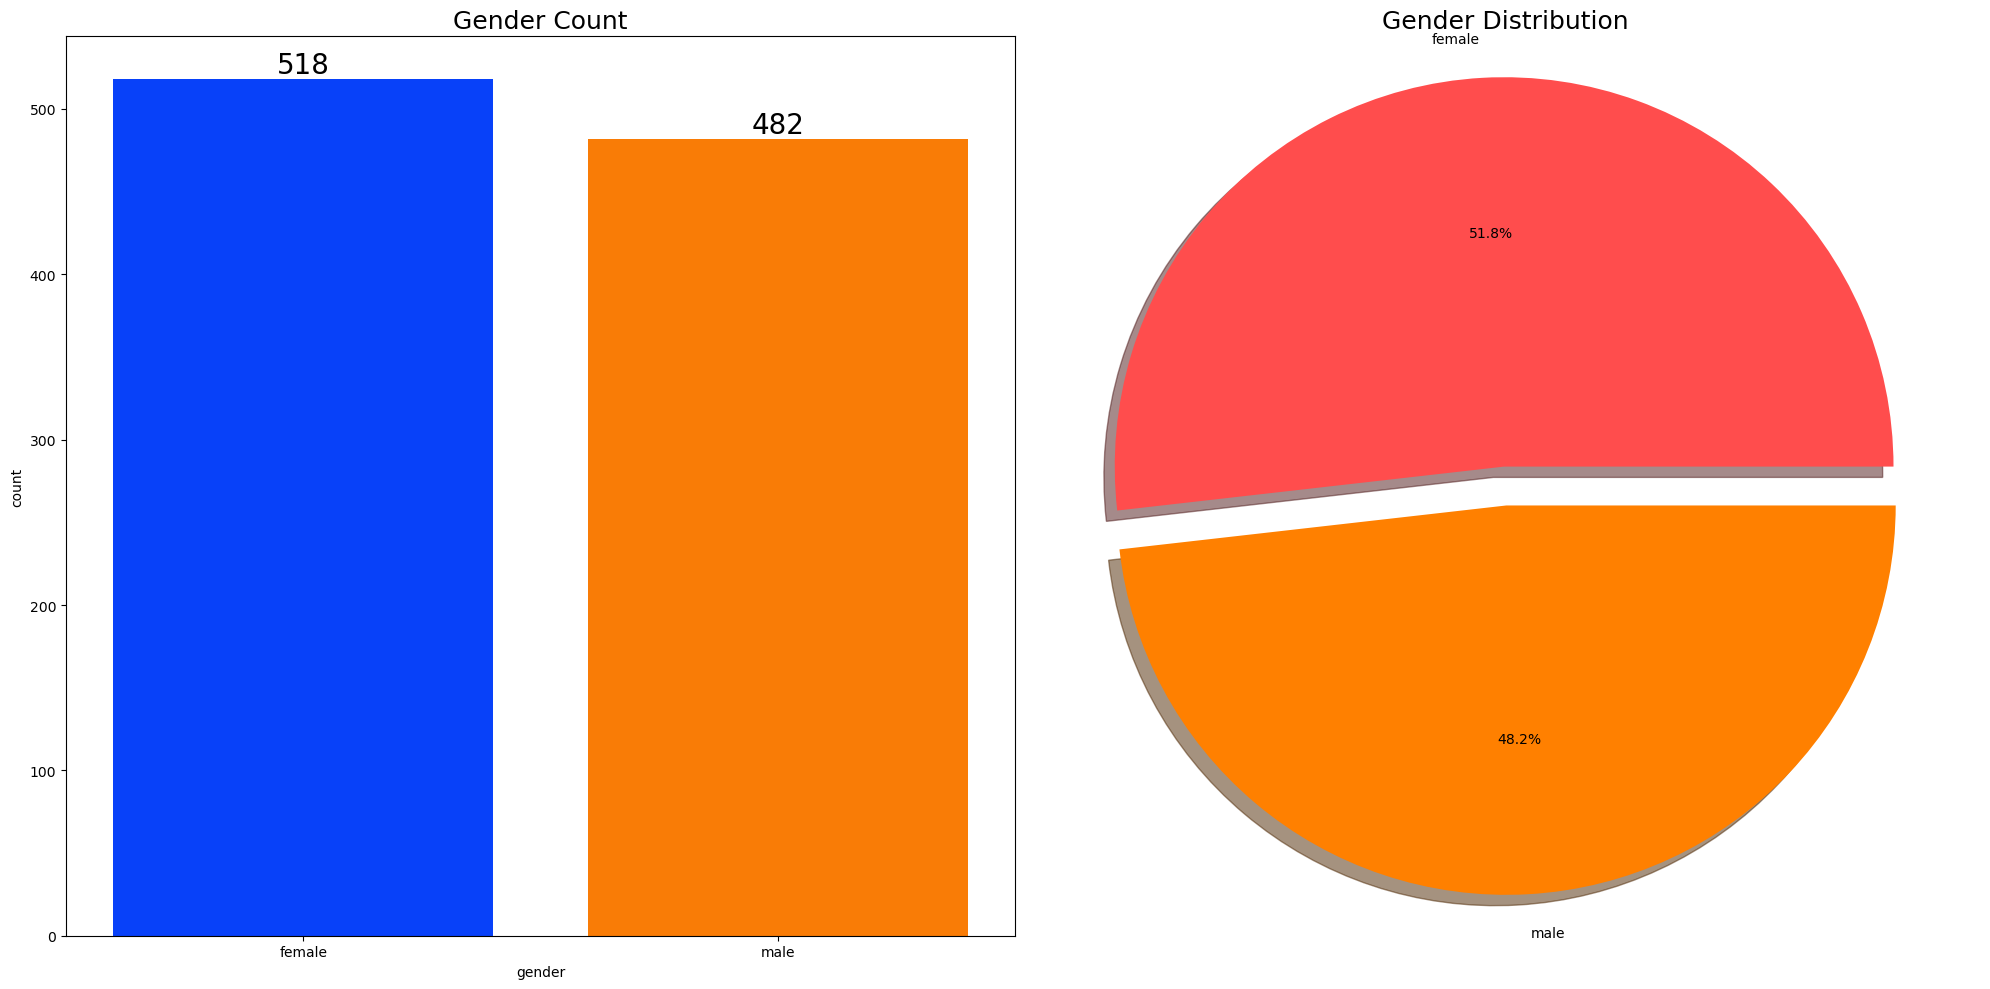

In [57]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(
    x='gender',
    data=df,
    palette='bright',
    ax=ax[0],
    saturation=0.95
)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

ax[0].set_title('Gender Count', fontsize=18)
gender_counts = df['gender'].value_counts()

ax[1].pie(
    gender_counts,
    labels=gender_counts.index,
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d', '#ff8000']
)

ax[1].set_title('Gender Distribution', fontsize=18)
ax[1].axis('equal')  # makes pie circular

plt.tight_layout()
plt.show()


In [61]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group


,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


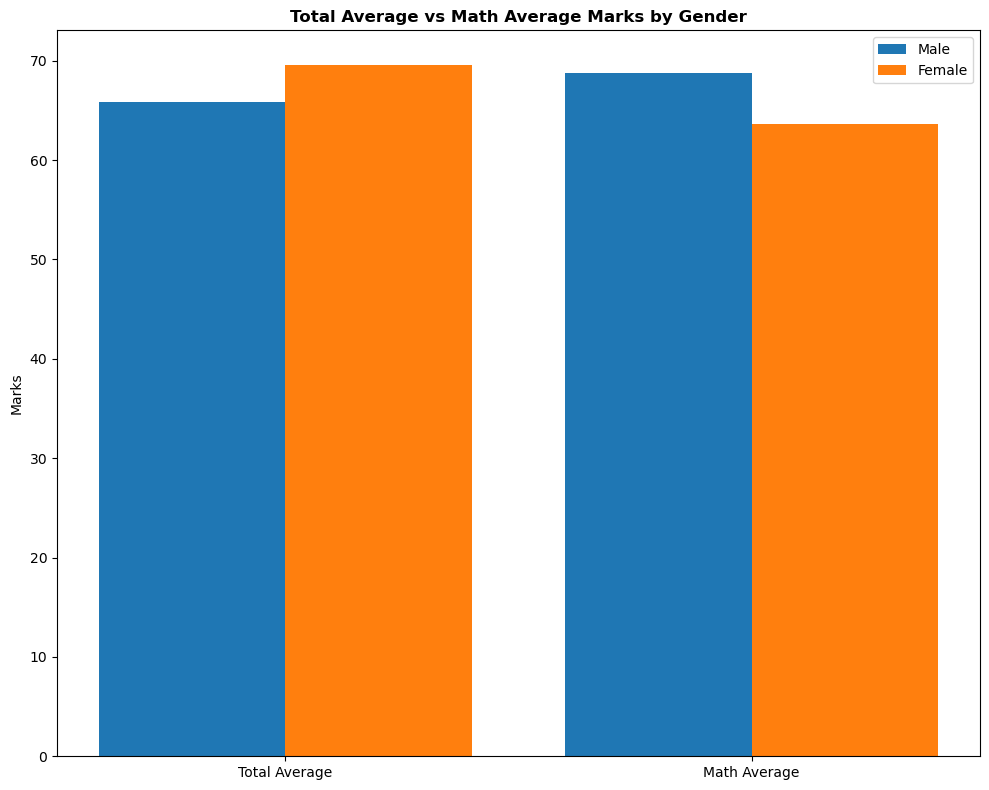

In [63]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [
    gender_group.loc['female', 'average'],
    gender_group.loc['female', 'math_score']
]

male_scores = [
    gender_group.loc['male', 'average'],
    gender_group.loc['male', 'math_score']
]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title(
    "Total Average vs Math Average Marks by Gender",
    fontweight='bold'
)
plt.legend()
plt.tight_layout()
plt.show()


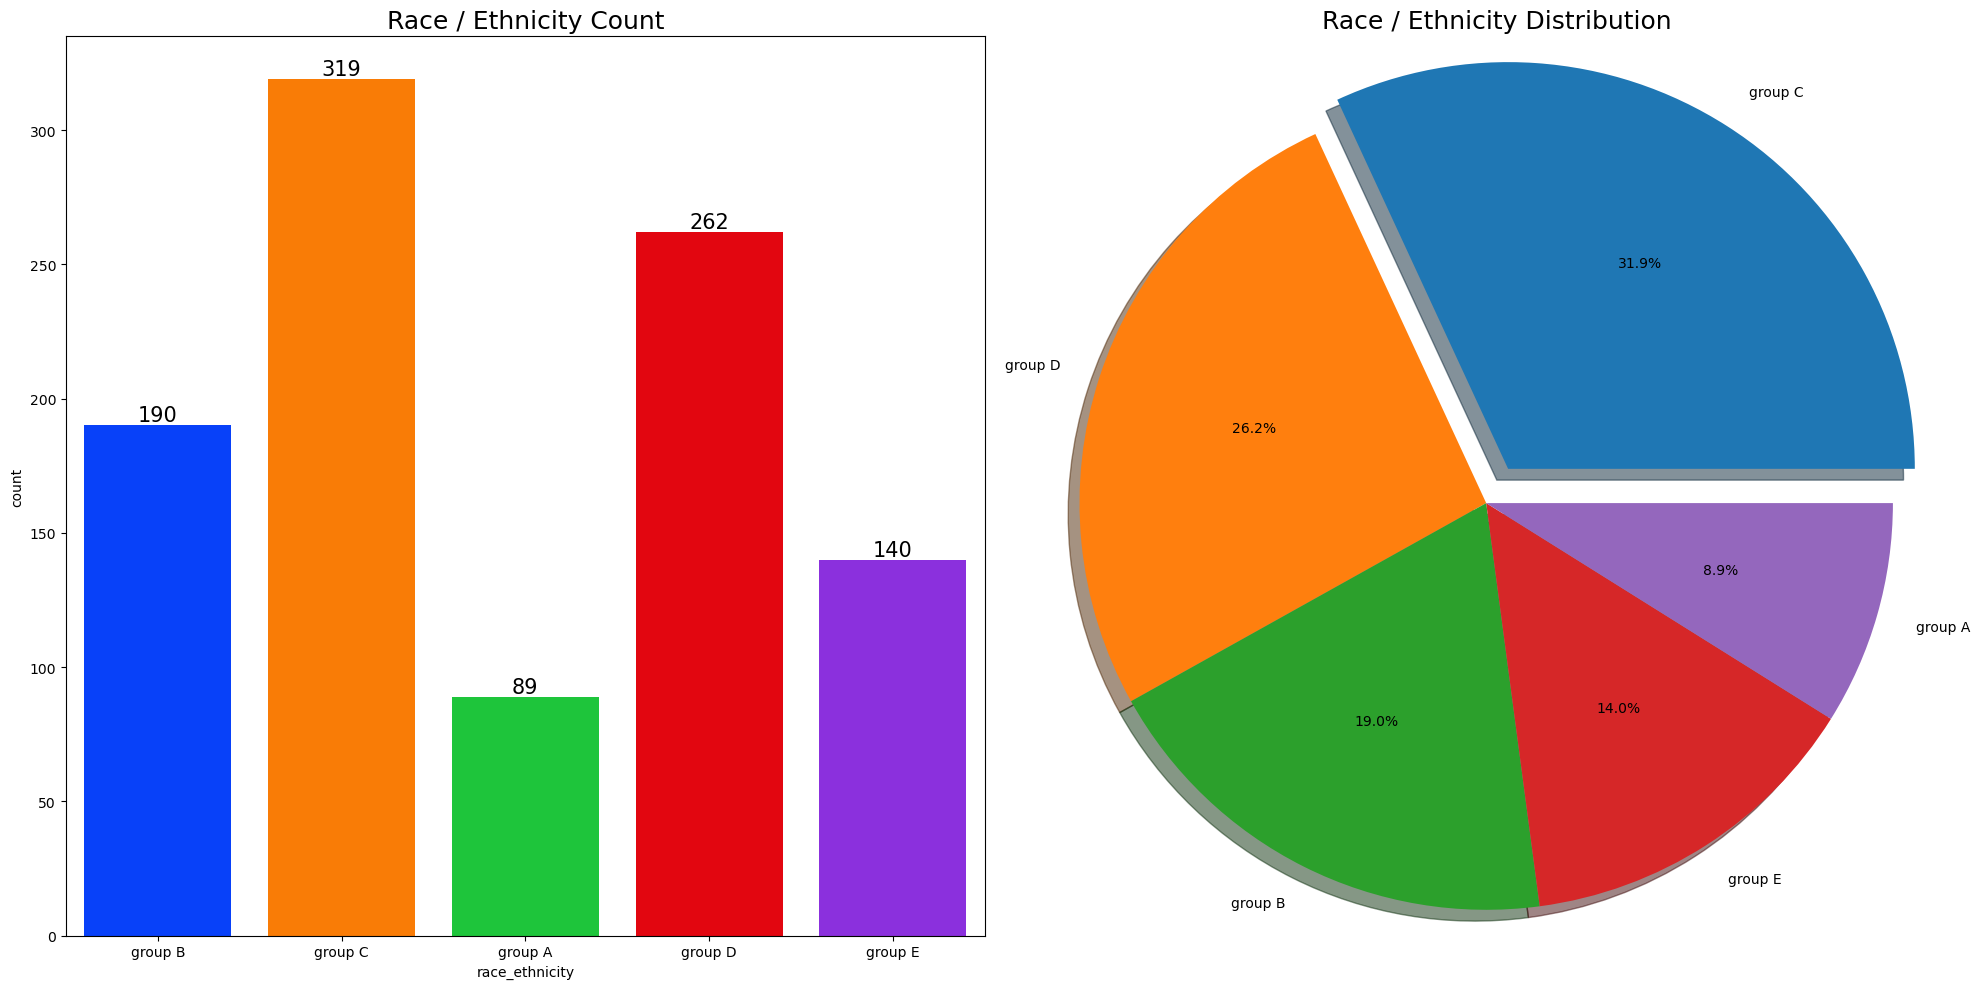

In [65]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(
    x='race_ethnicity',
    data=df,
    palette='bright',
    ax=ax[0],
    saturation=0.95
)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[0].set_title('Race / Ethnicity Count', fontsize=18)

race_counts = df['race_ethnicity'].value_counts()

ax[1].pie(
    race_counts,
    labels=race_counts.index,
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True
)

ax[1].set_title('Race / Ethnicity Distribution', fontsize=18)
ax[1].axis('equal')

plt.tight_layout()
plt.show()


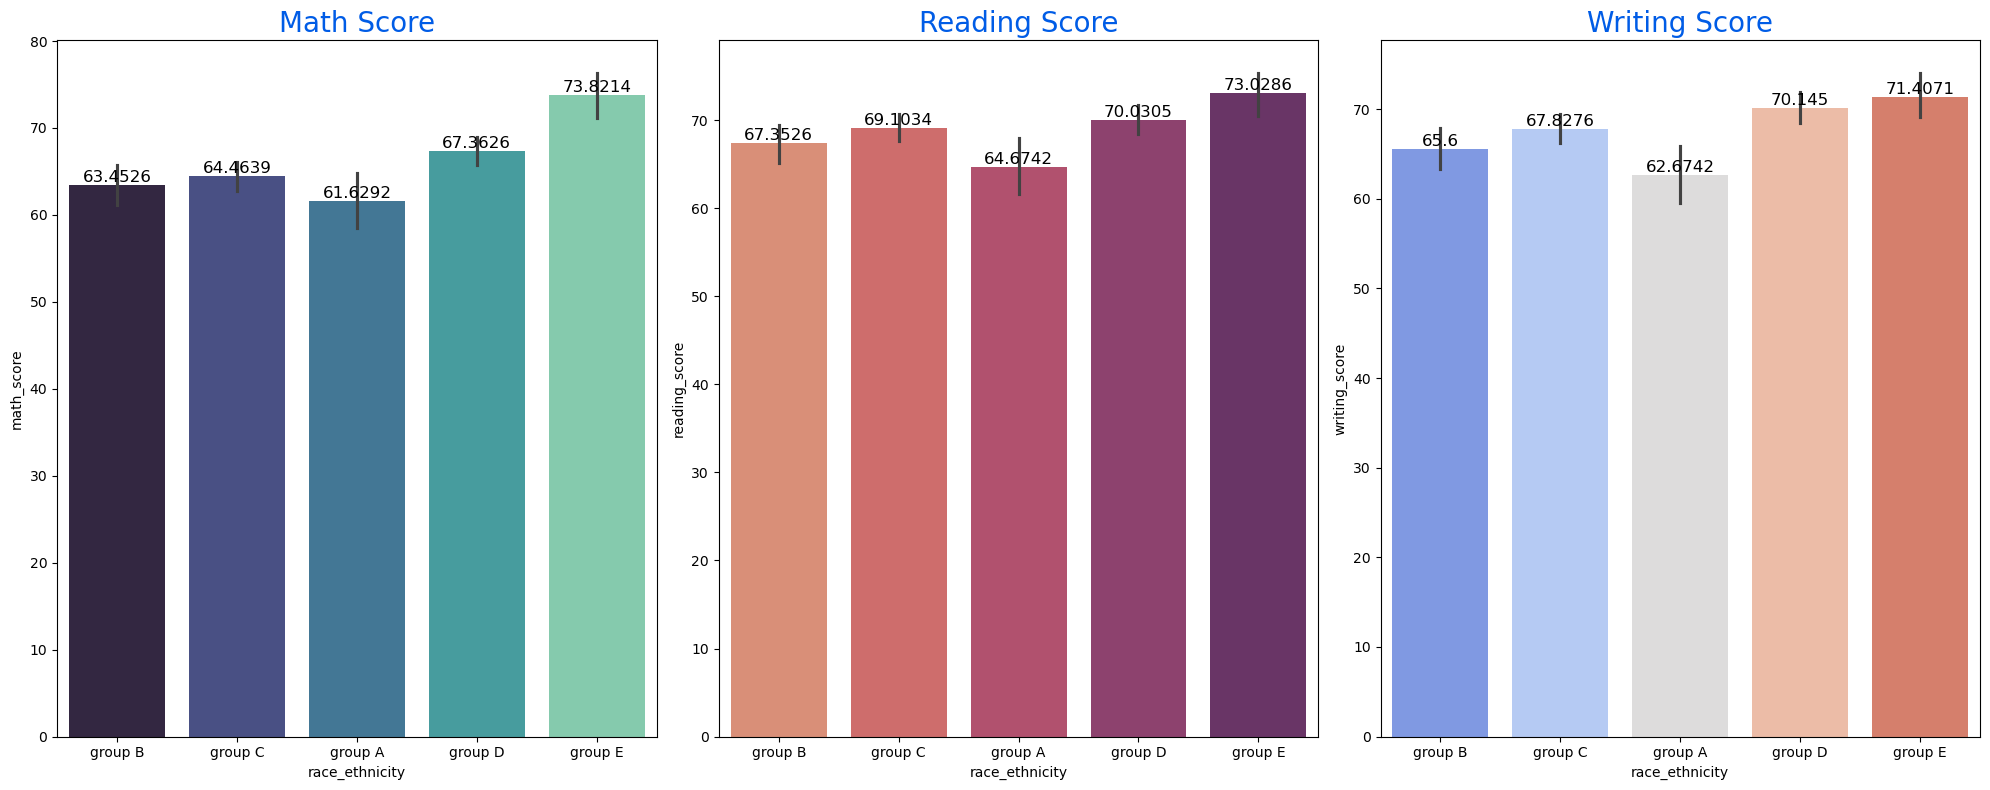

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 3, figsize=(20, 8))


sns.barplot(
    data=df,
    x='race_ethnicity',
    y='math_score',
    estimator=np.mean,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)



sns.barplot(
    data=df,
    x='race_ethnicity',
    y='reading_score',
    estimator=np.mean,
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)



sns.barplot(
    data=df,
    x='race_ethnicity',
    y='writing_score',
    estimator=np.mean,
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=12)

plt.tight_layout()
plt.show()


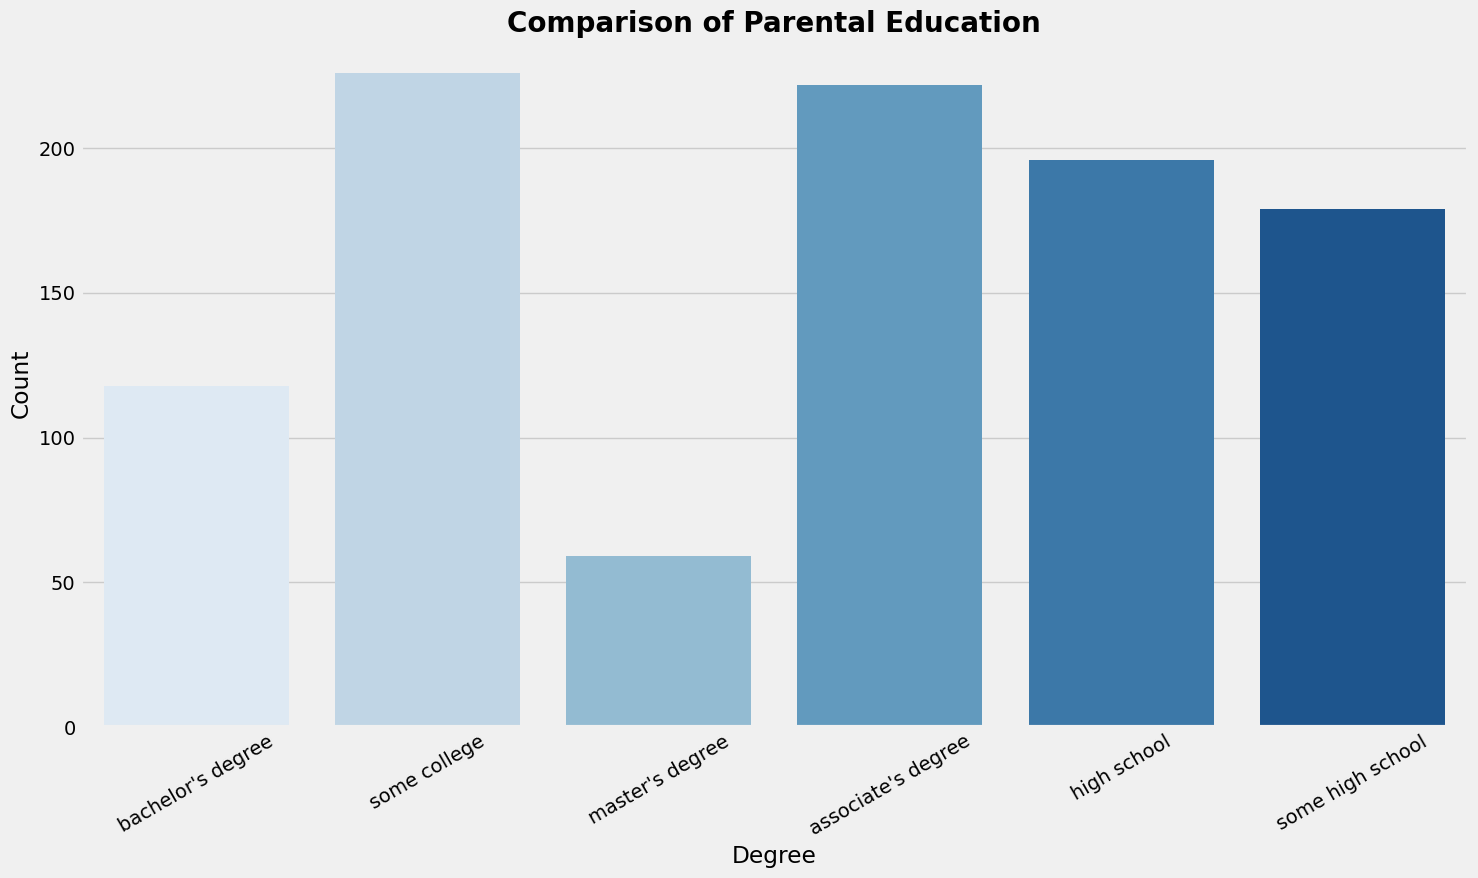

In [69]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(
    x='parental_level_of_education',
    data=df,
    palette='Blues'
)

plt.title('Comparison of Parental Education', fontsize=20, fontweight='bold')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


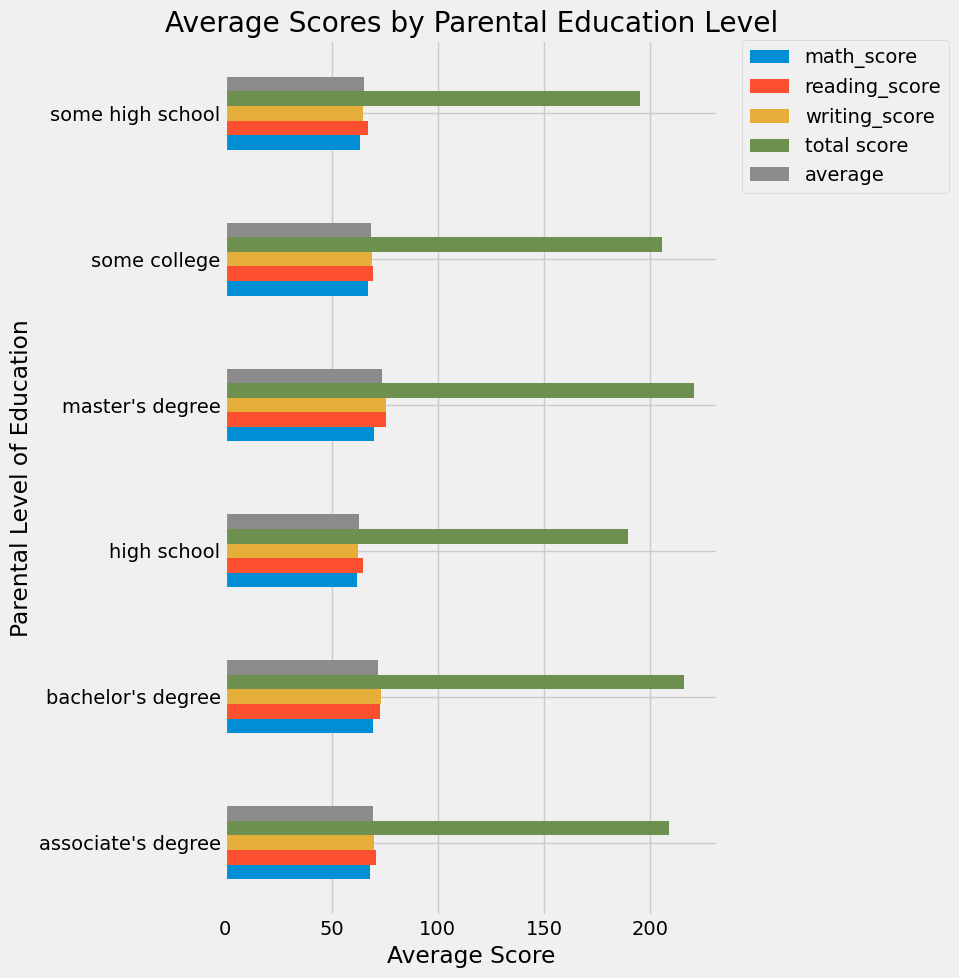

In [73]:
(
    df.groupby('parental_level_of_education')
      .mean(numeric_only=True)
      .plot(kind='barh', figsize=(10, 10))
)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Average Score')
plt.ylabel('Parental Level of Education')
plt.title('Average Scores by Parental Education Level')
plt.tight_layout()
plt.show()


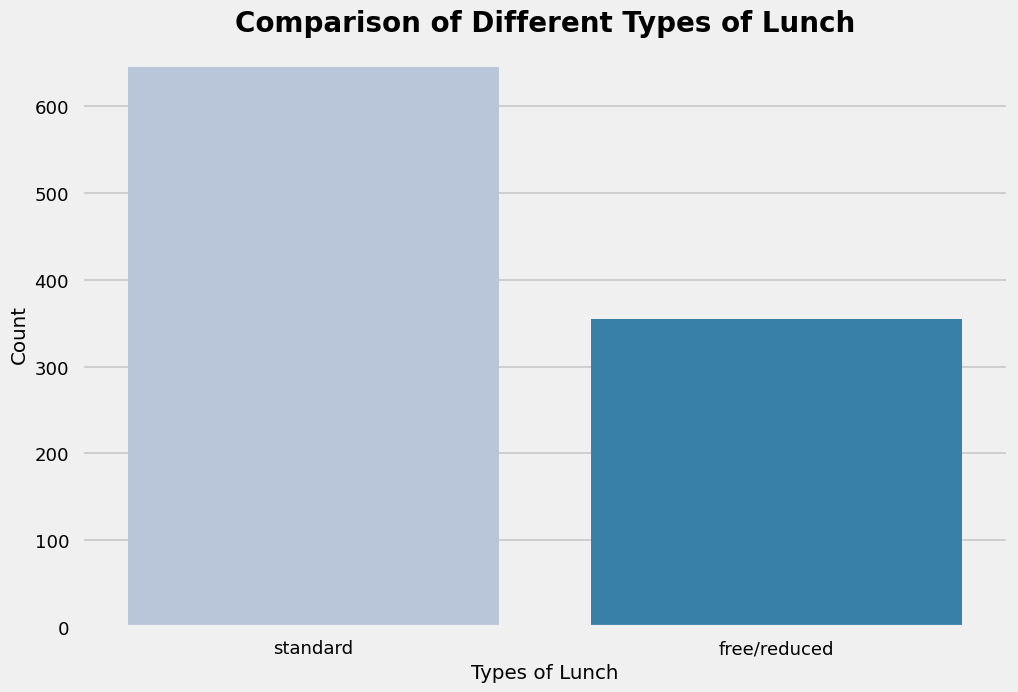

In [75]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')  # updated style name

sns.countplot(
    x='lunch',
    data=df,
    palette='PuBu'
)

plt.title('Comparison of Different Types of Lunch', fontsize=20, fontweight='bold')
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


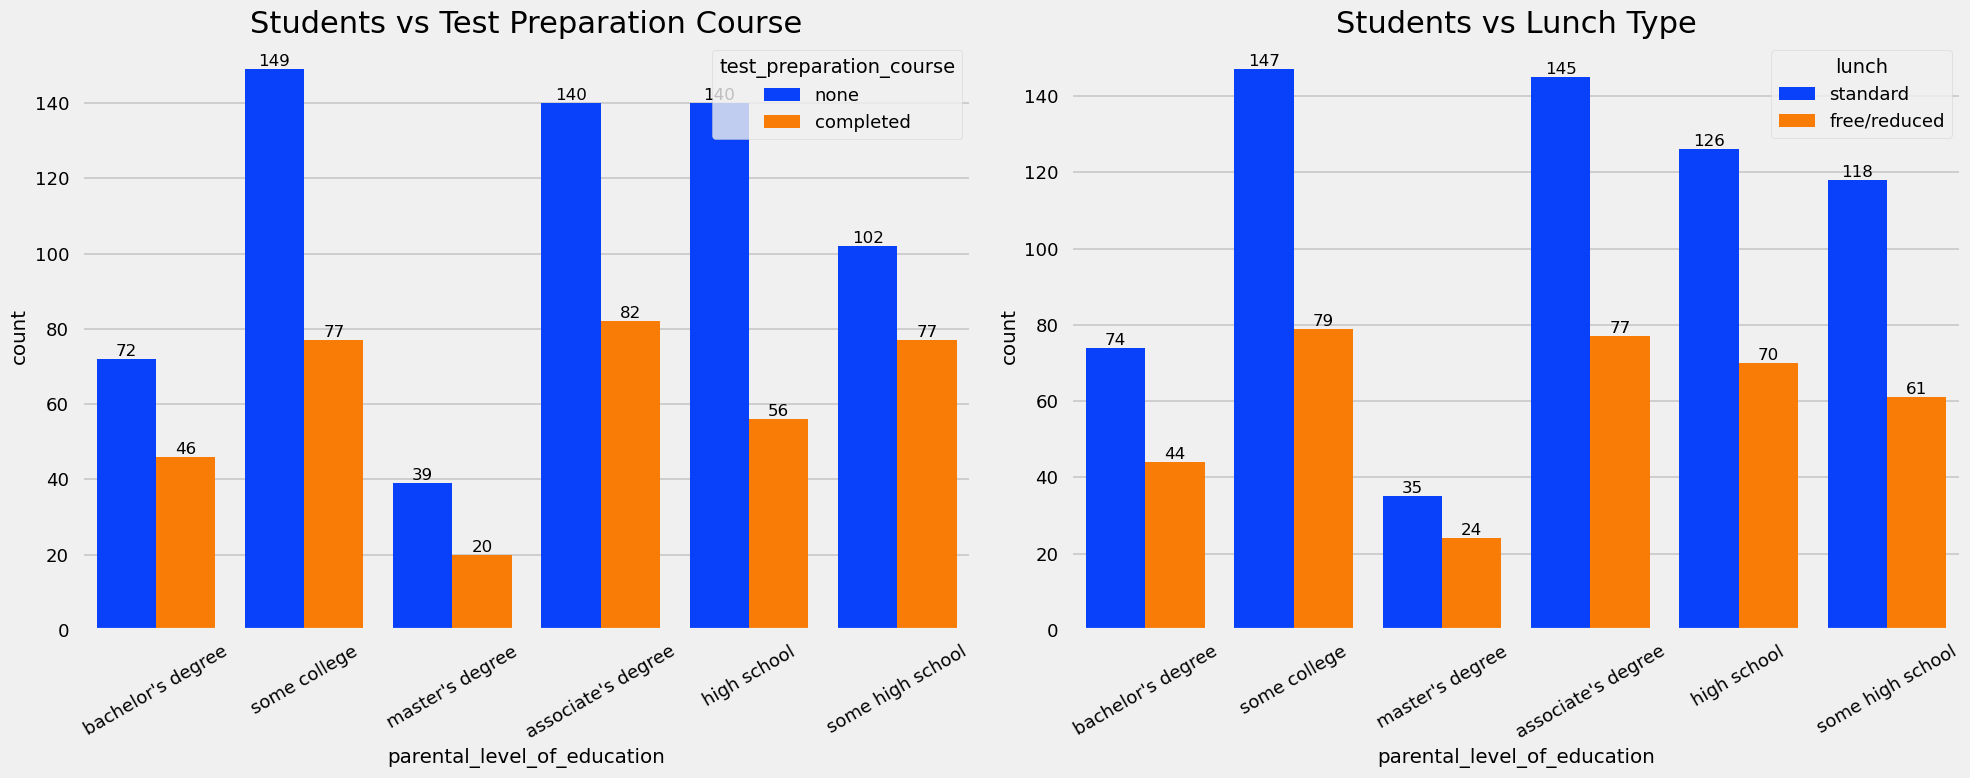

In [77]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))


sns.countplot(
    x='parental_level_of_education',
    data=df,
    palette='bright',
    hue='test_preparation_course',
    saturation=0.95,
    ax=ax[0]
)

ax[0].set_title(
    'Students vs Test Preparation Course',
    color='black',
    size=22
)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

ax[0].tick_params(axis='x', rotation=30)



sns.countplot(
    x='parental_level_of_education',
    data=df,
    palette='bright',
    hue='lunch',
    saturation=0.95,
    ax=ax[1]
)

ax[1].set_title(
    'Students vs Lunch Type',
    color='black',
    size=22
)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

ax[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


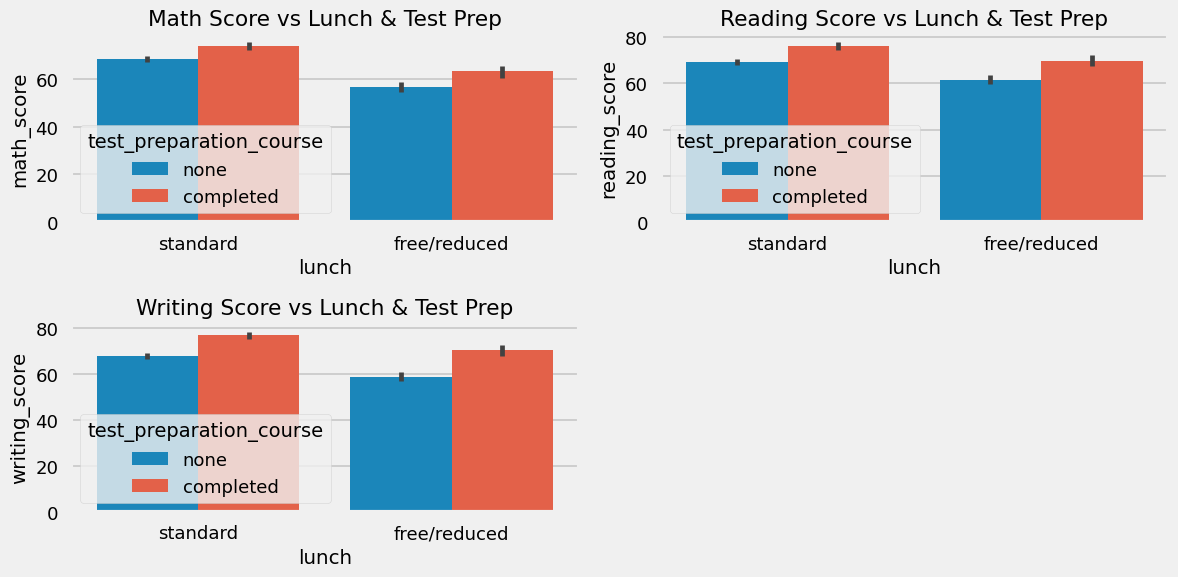

In [79]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(
    x='lunch',
    y='math_score',
    hue='test_preparation_course',
    data=df
)
plt.title('Math Score vs Lunch & Test Prep')


plt.subplot(2, 2, 2)
sns.barplot(
    x='lunch',
    y='reading_score',
    hue='test_preparation_course',
    data=df
)
plt.title('Reading Score vs Lunch & Test Prep')


plt.subplot(2, 2, 3)
sns.barplot(
    x='lunch',
    y='writing_score',
    hue='test_preparation_course',
    data=df
)
plt.title('Writing Score vs Lunch & Test Prep')

plt.tight_layout()
plt.show()


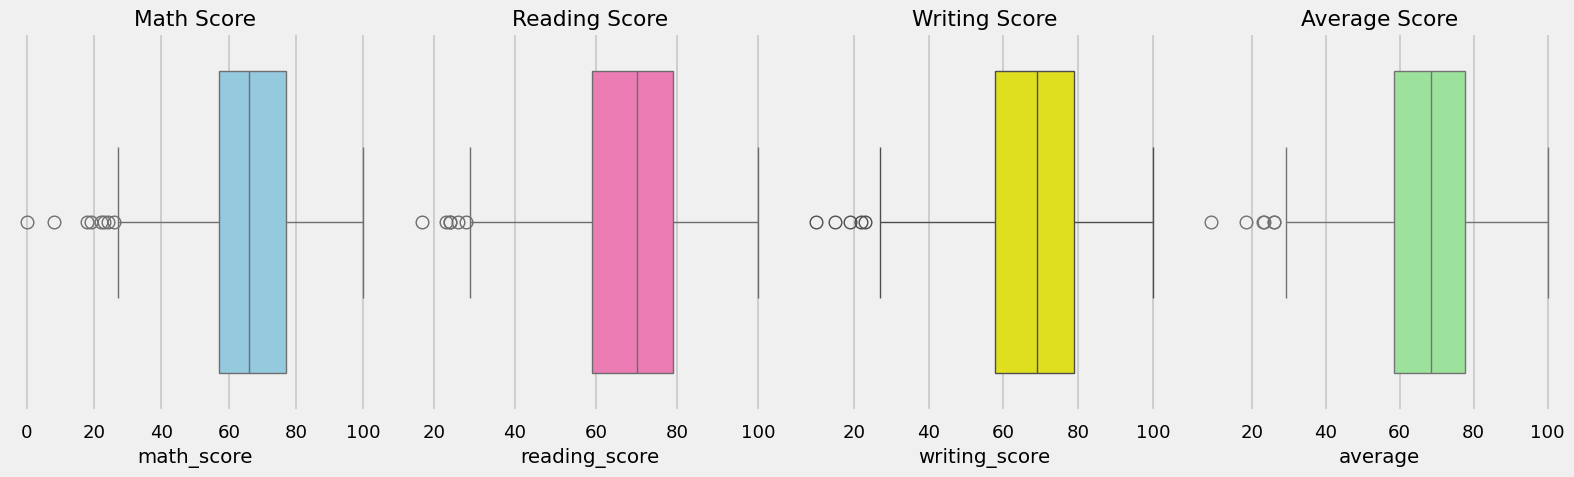

In [81]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
sns.boxplot(x=df['math_score'], color='skyblue')
plt.title('Math Score')

plt.subplot(1, 4, 2)
sns.boxplot(x=df['reading_score'], color='hotpink')
plt.title('Reading Score')

plt.subplot(1, 4, 3)
sns.boxplot(x=df['writing_score'], color='yellow')
plt.title('Writing Score')

plt.subplot(1, 4, 4)
sns.boxplot(x=df['average'], color='lightgreen')
plt.title('Average Score')

plt.tight_layout()
plt.show()


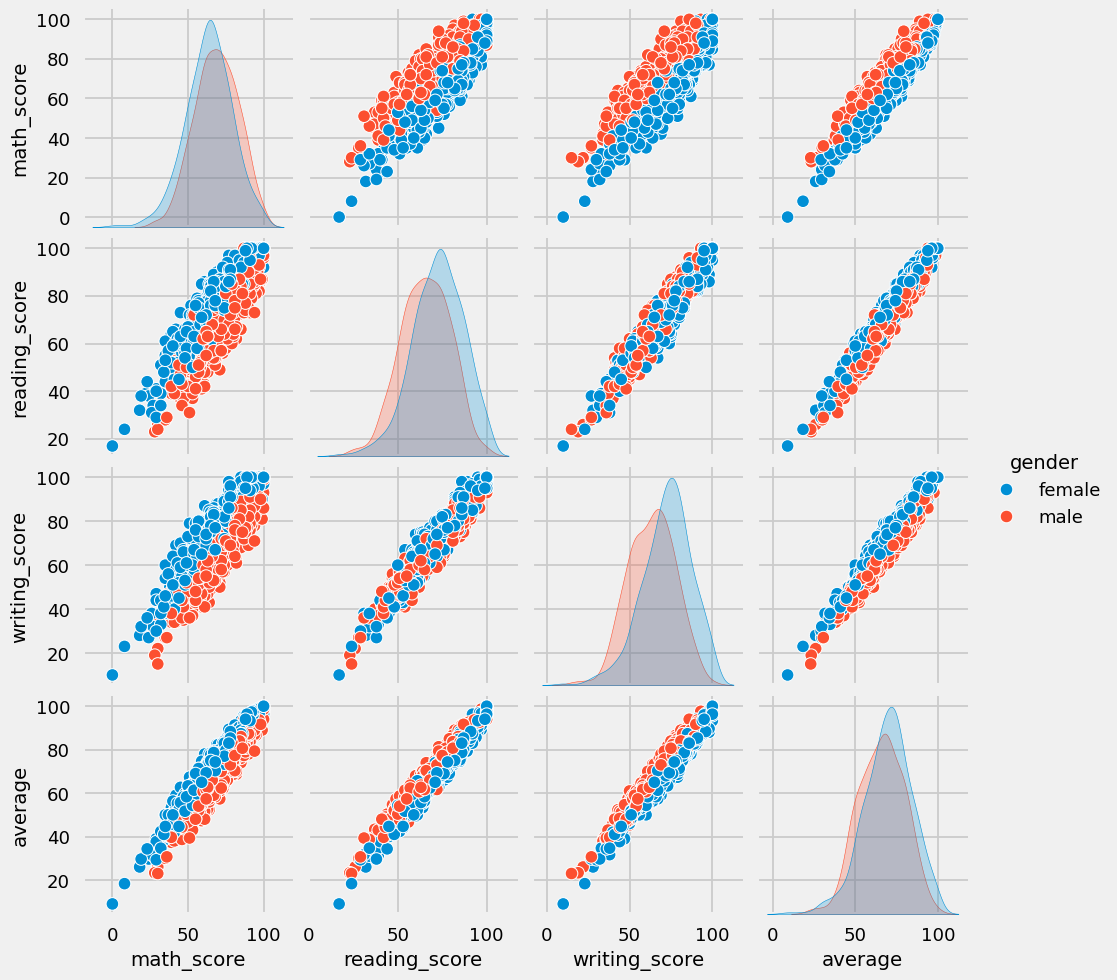

In [83]:
numeric_cols = [
    'math_score',
    'reading_score',
    'writing_score',
    'average'
]

sns.pairplot(
    df[numeric_cols + ['gender']],
    hue='gender',
    diag_kind='kde'
)
plt.show()


Conclusions
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.